In [1]:
import numpy as np
import seaborn as sb
from pymc3 import hpd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
@np.vectorize
def exponential(x):
    return 1.5 * np.exp(-1.5 * x)

In [4]:
xvals = np.linspace(0, 5, 100)

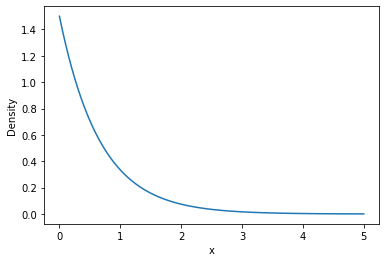

In [5]:
plt.plot(xvals, exponential(xvals))
plt.xlabel('x')
plt.ylabel('Density')
plt.savefig('exponential.svg')

In [51]:
sample1 = np.random.chisquare(3, 50)
sample2 = np.random.chisquare(3, 1000)

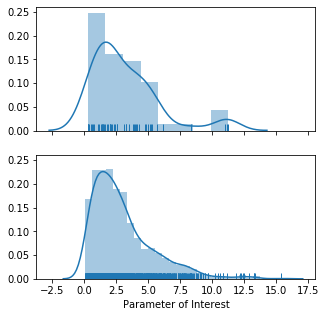

In [60]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(5, 5))
sb.distplot(sample1, rug=True, ax=ax[0])
sb.distplot(sample2, rug=True, ax=ax[1], axlabel="Parameter of Interest")
fig.savefig("kde.svg")

In [53]:
hpd1 = hpd(sample1)
hpd2 = hpd(sample2)

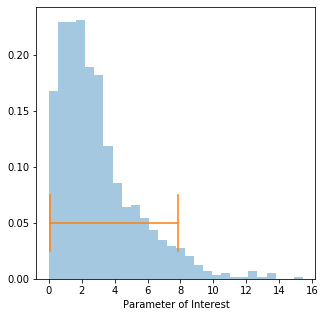

In [59]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(5, 5))
sb.distplot(sample2, kde=False, norm_hist=True, ax=ax, axlabel="Parameter of Interest")
# sb.distplot(sample2, kde=False, norm_hist=True, ax=ax[1])
ax.plot(hpd2, [0.05, 0.05], color='C1')
ax.plot([hpd2[0], hpd2[0]], [0.025, 0.075], color='C1')
ax.plot([hpd2[1], hpd2[1]], [0.025, 0.075], color='C1')

# ax[1].plot(hpd2, [0.05, 0.05], color='C1')
# ax[1].plot([hpd2[0], hpd2[0]], [0.025, 0.075], color='C1')
# ax[1].plot([hpd2[1], hpd2[1]], [0.025, 0.075], color='C1')

fig.savefig("hpd.svg")